In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [149]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [150]:
df=pd.read_csv('/content/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [151]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [152]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [153]:
df.shape

(1000, 40)

In [154]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [155]:
df=df.drop(columns=['_c39','policy_number'])

In [156]:
for col in df.select_dtypes(include='object'):
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for policy_bind_date:
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
28-01-2010    2
29-09-1999    2
25-09-2001    2
04-05-2000    2
03-02-1997    2
07-04-1999    2
25-12-2013    2
28-12-1991    2
30-08-1993    2
21-09-2005    2
20-07-1991    2
29-01-1998    2
24-06-1990    2
22-08-1991    2
09-07-2002    2
07-12-1999    2
07-07-1996    2
16-07-2002    2
11-11-1998    2
28-12-2002    2
03-01-2004    2
05-07-2014    2
15-05-1997    2
14-04-1992    2
09-03-2003    2
07-11-1997    2
05-01-1992    2
15-11-1997    2
14-07-1997    2
06-05-2007    2
21-09-1996    2
16-05-2008    2
21-12-2002    2
11-03-2010    2
19-09-1995    2
08-11-2009    2
07-12-1995    2
25-05-1990    2
20-09-1990    2
04-06-2000    2
27-07-2014    2
07-04-1994    1
29-02-1992    1
09-08-2002    1
16-09-1990    1
02-12-2012    1
22-03-2000    1
09-10-1995    1
11-12-1998    1
13-04-2002    1
17-06-2008    1
28-07-2002    1
21-12-1999    1
27-05-2002    1
28-03-1990    1
05-12

In [157]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date_vs_policy_bind_date'] = (df['incident_date'] - df['policy_bind_date']).dt.days


In [158]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_date_vs_policy_bind_date
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5371
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,9260
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,256


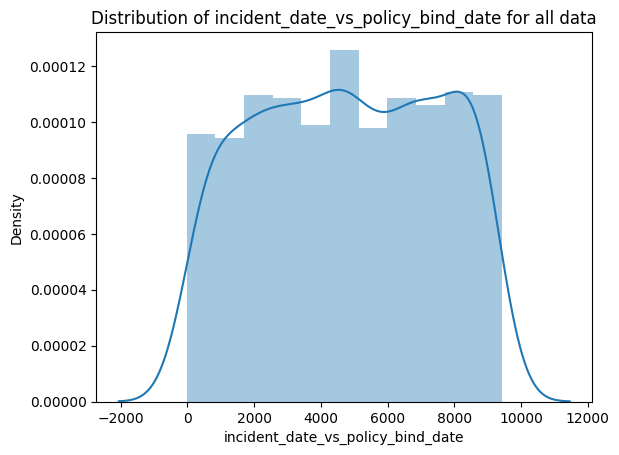

In [159]:
#distribution plots for incident_date_vs_policy_bind_date
sns.distplot(df['incident_date_vs_policy_bind_date'])
plt.title('Distribution of incident_date_vs_policy_bind_date for all data')
plt.show()

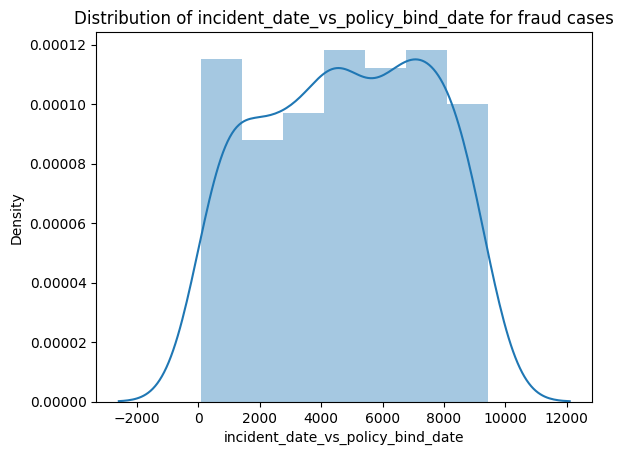

In [160]:
# Create a subset dataframe for fraud cases
fraud_df = df[df['fraud_reported'] == 'Y']

sns.distplot(fraud_df['incident_date_vs_policy_bind_date'])
plt.title('Distribution of incident_date_vs_policy_bind_date for fraud cases')
plt.show()

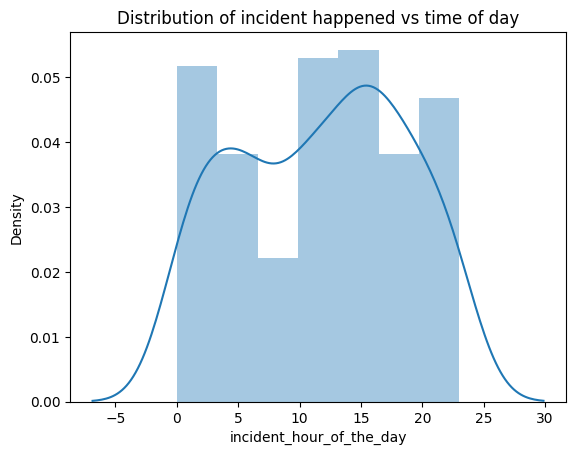

In [161]:
#distribution of time for fraud cases
sns.distplot(fraud_df['incident_hour_of_the_day'])
plt.title('Distribution of incident happened vs time of day')
plt.show()

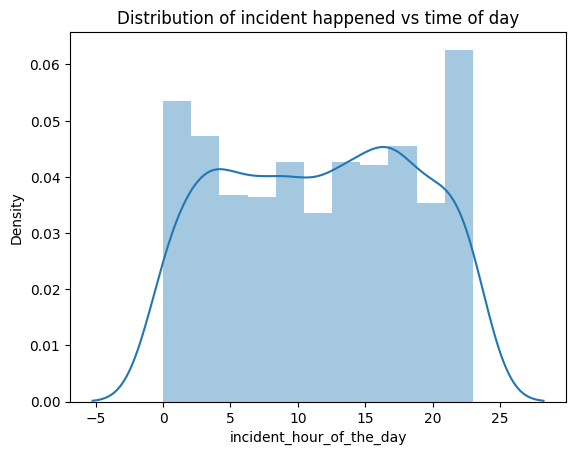

In [162]:
#distribution of time for whole dataset
sns.distplot(df['incident_hour_of_the_day'])
plt.title('Distribution of incident happened vs time of day')
plt.show()

In [163]:
df_new = df[df['collision_type'] != '?']

In [164]:
df_new.shape

(822, 39)

In [165]:
#droping column since majority of data is not correct
df_new=df_new.drop(columns=['property_damage','police_report_available'])

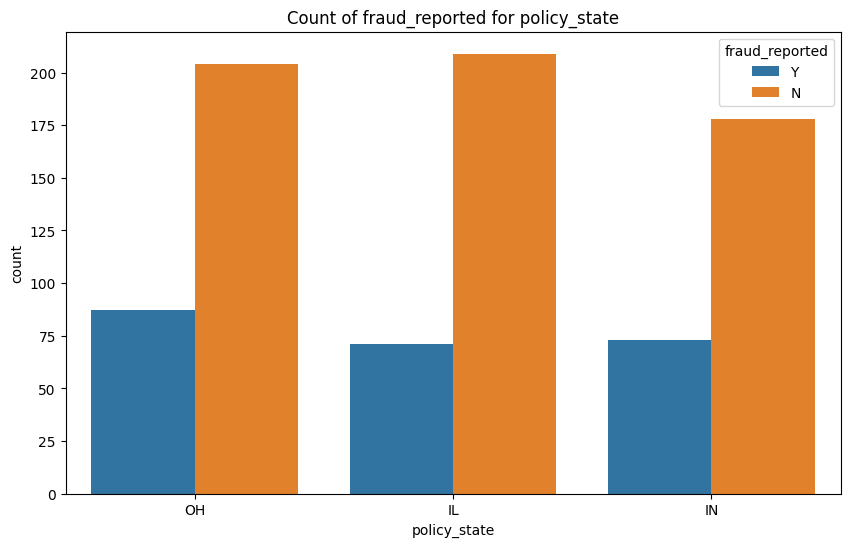

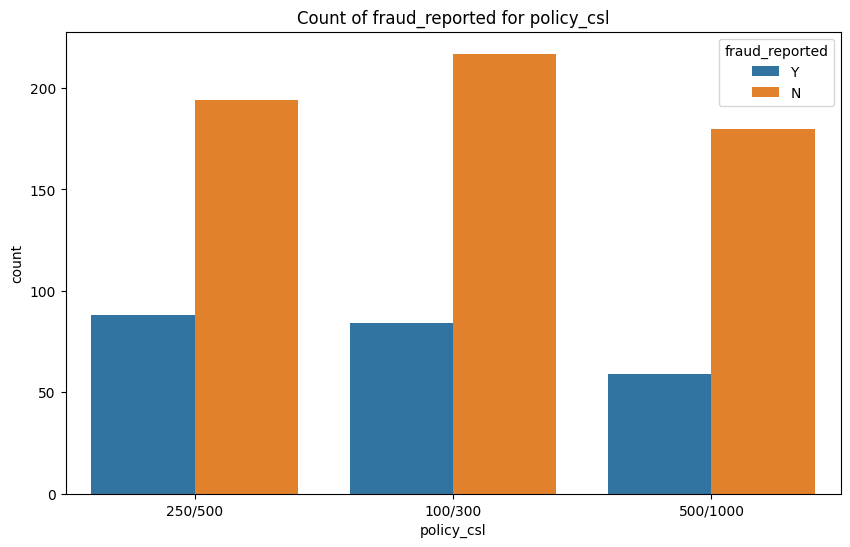

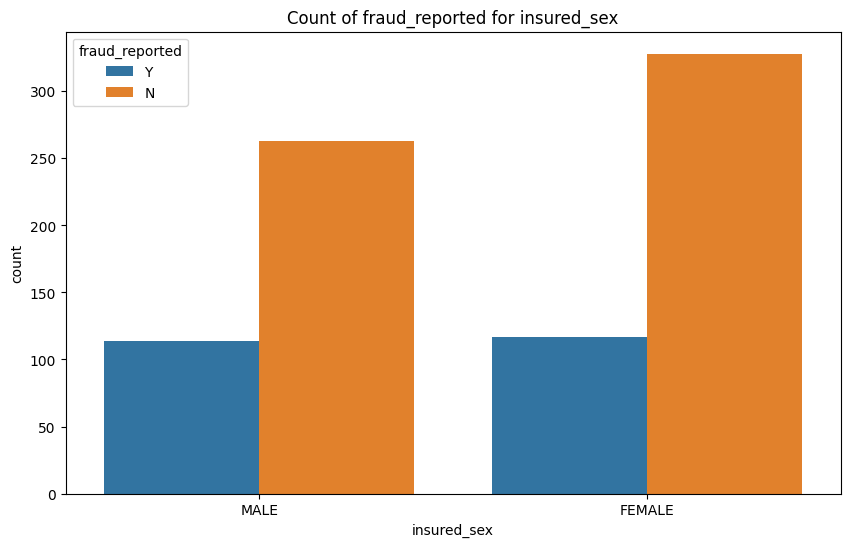

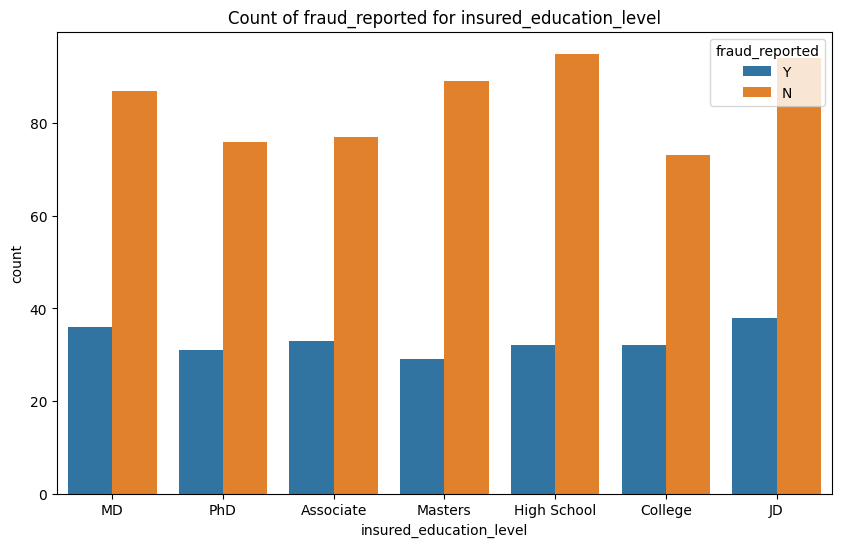

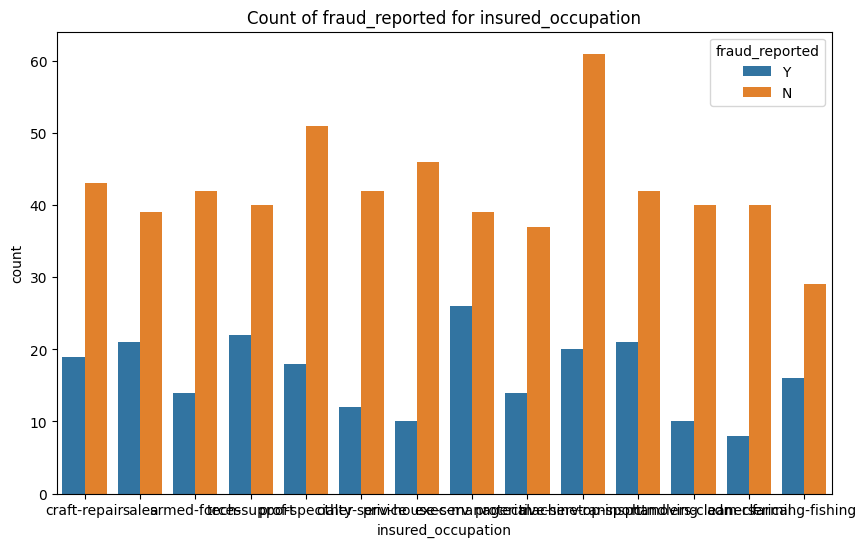

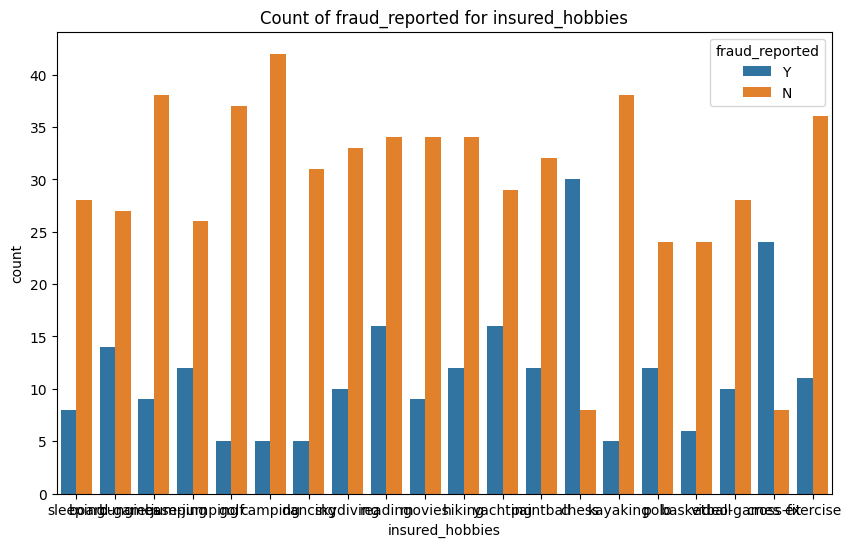

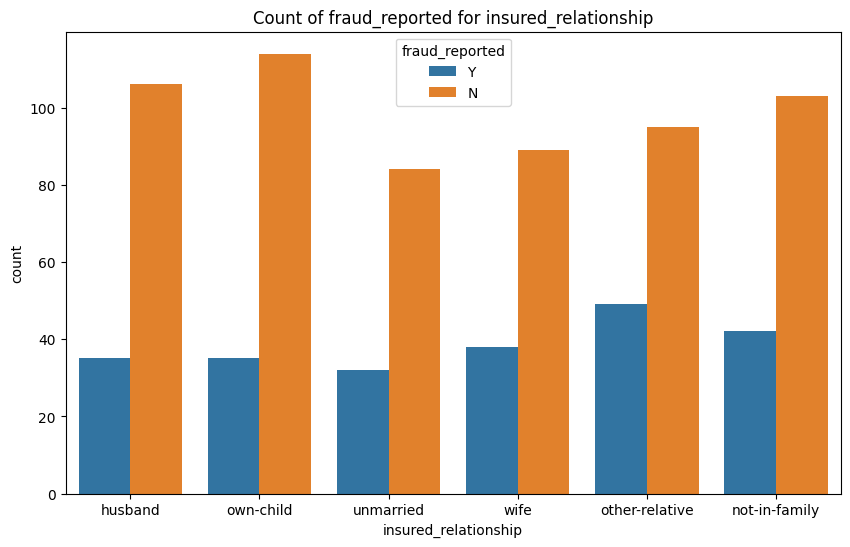

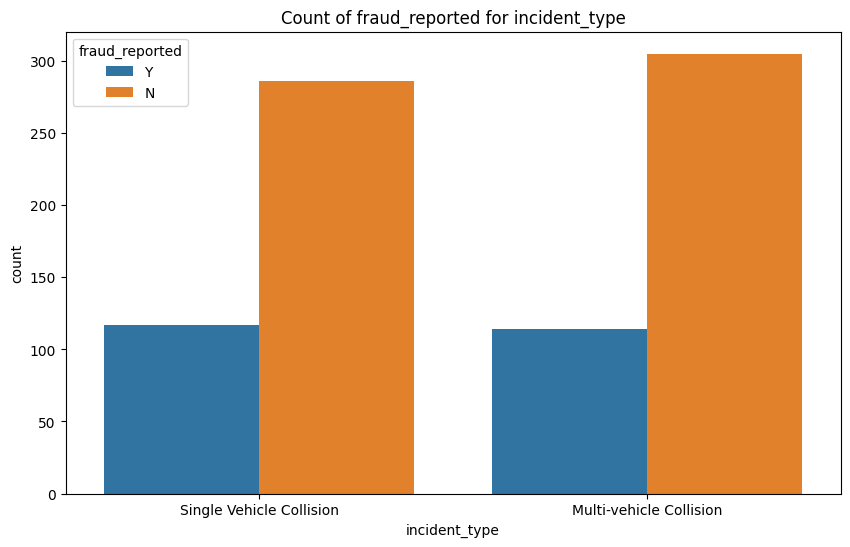

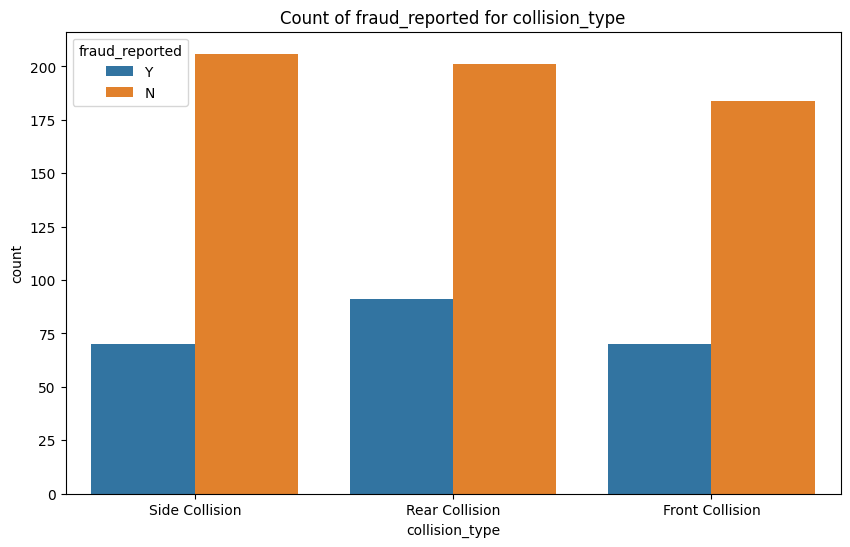

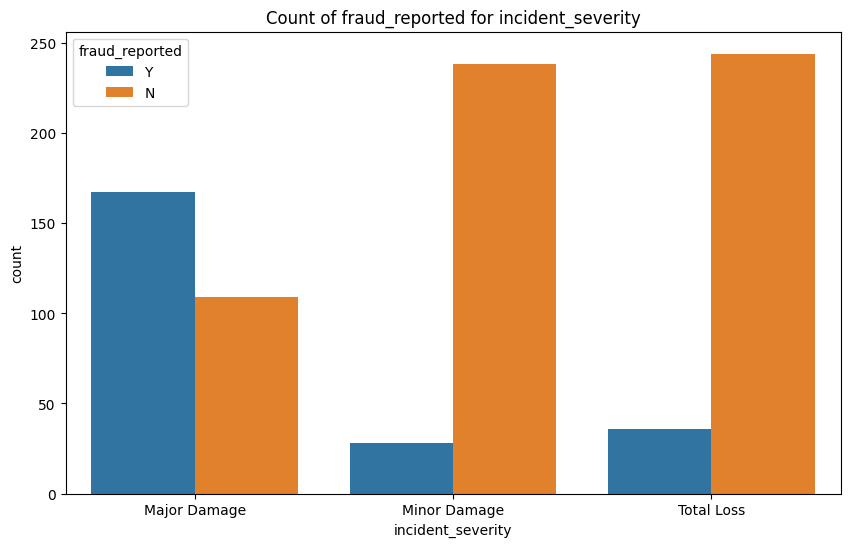

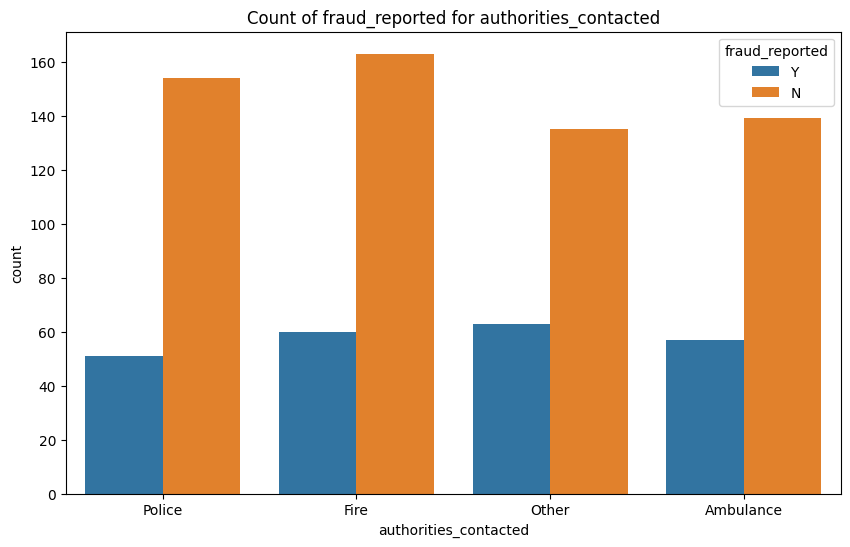

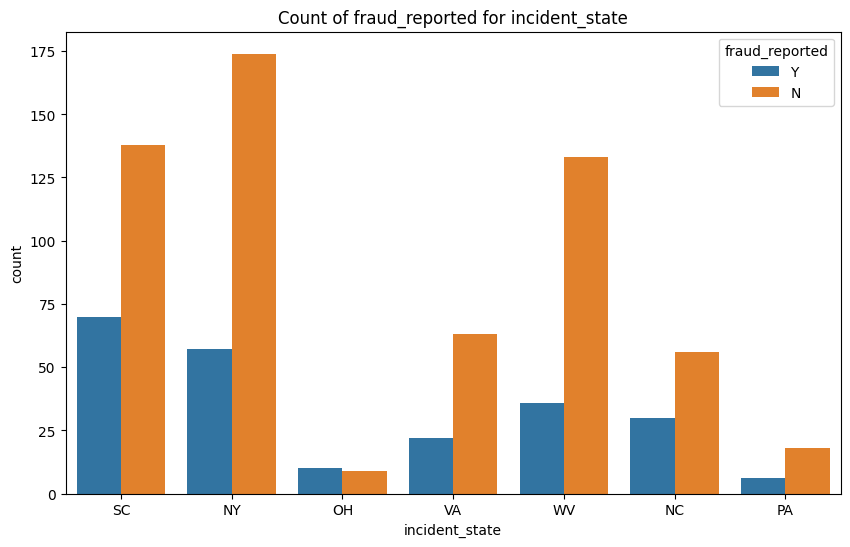

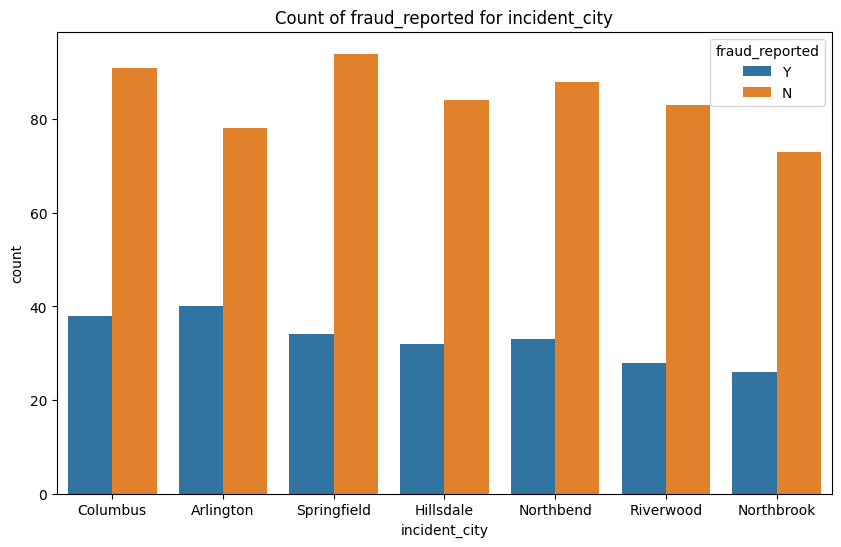

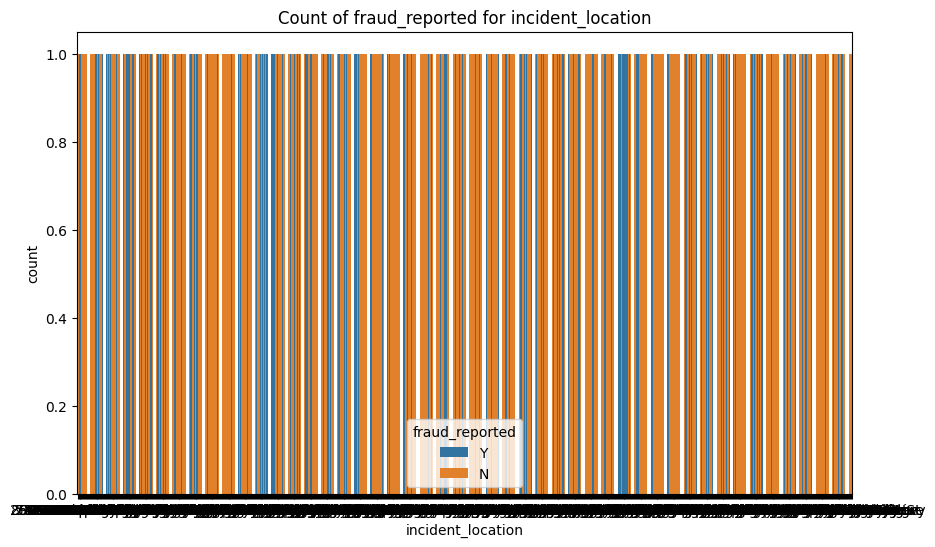

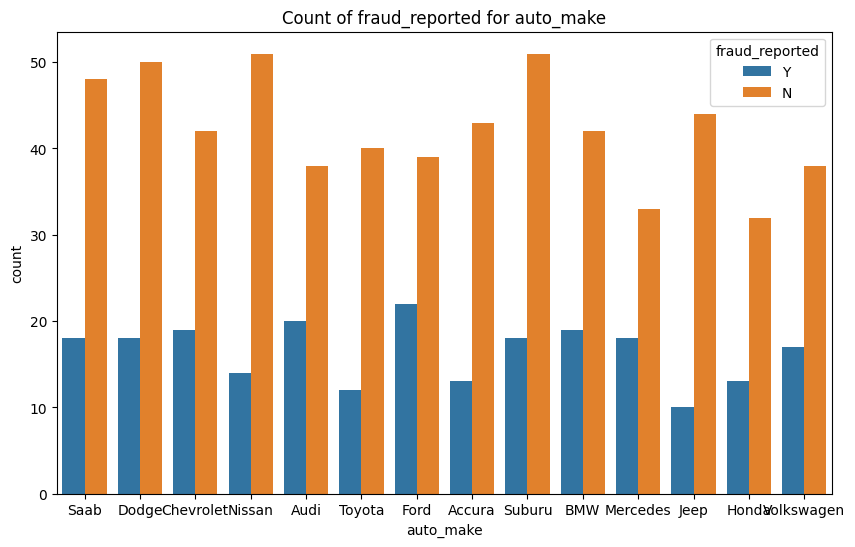

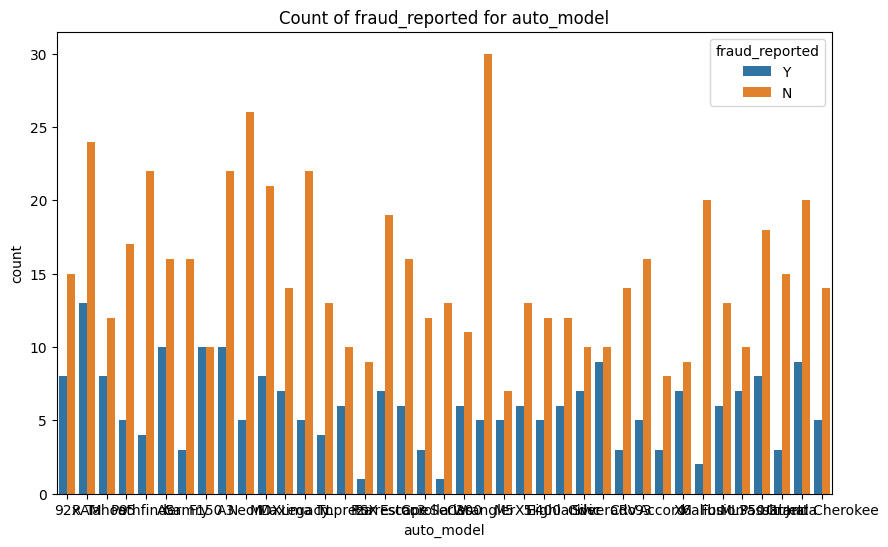

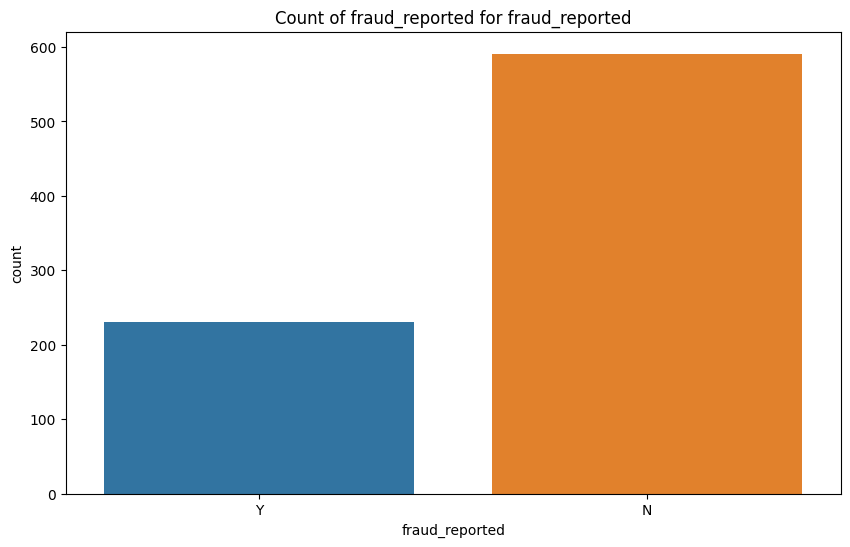

In [166]:
# Univariate analysis for categorical variables
for col in df_new.select_dtypes(include='object'):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='fraud_reported', data=df_new)
    plt.title(f'Count of fraud_reported for {col}')
    plt.show()

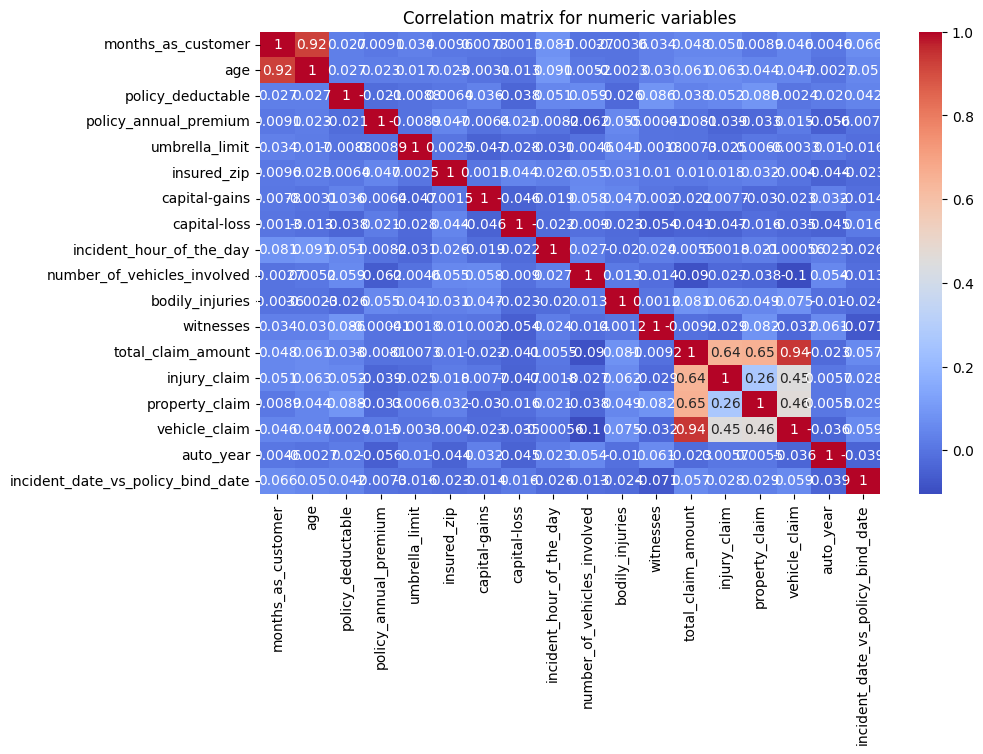

In [167]:
# Multivariate analysis using a heatmap
corr_matrix = df_new.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix for numeric variables')
plt.show()

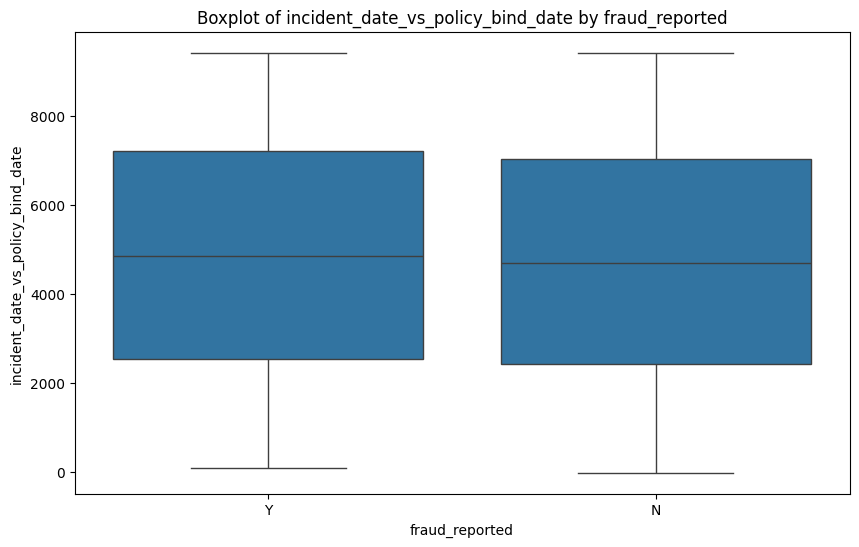

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_reported', y='incident_date_vs_policy_bind_date', data=df_new)
plt.title('Boxplot of incident_date_vs_policy_bind_date by fraud_reported')
plt.show()

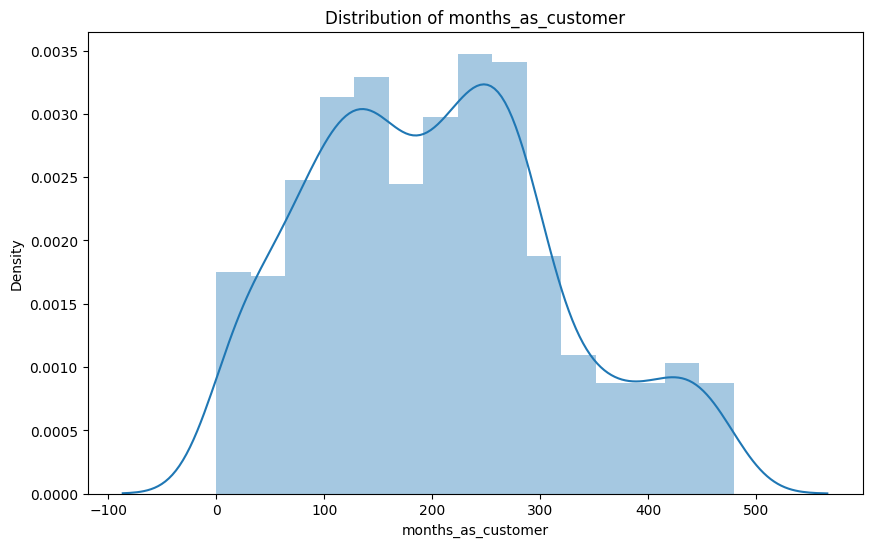

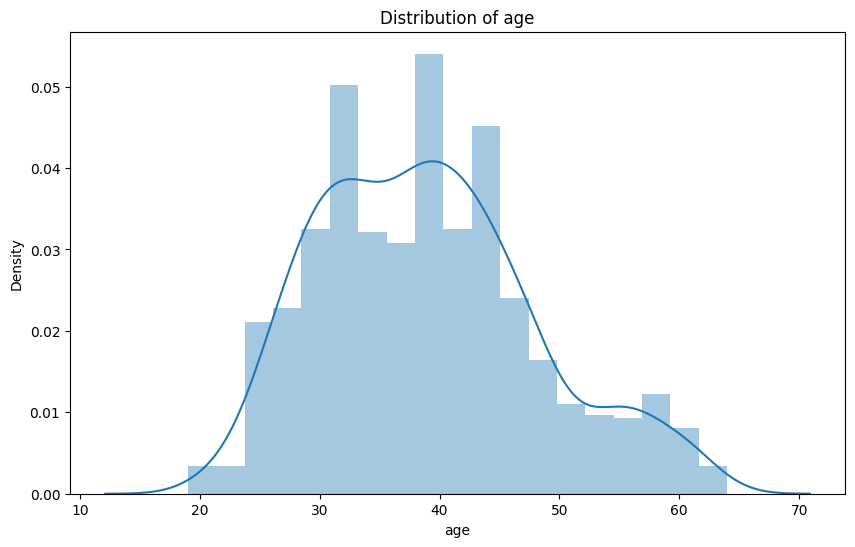

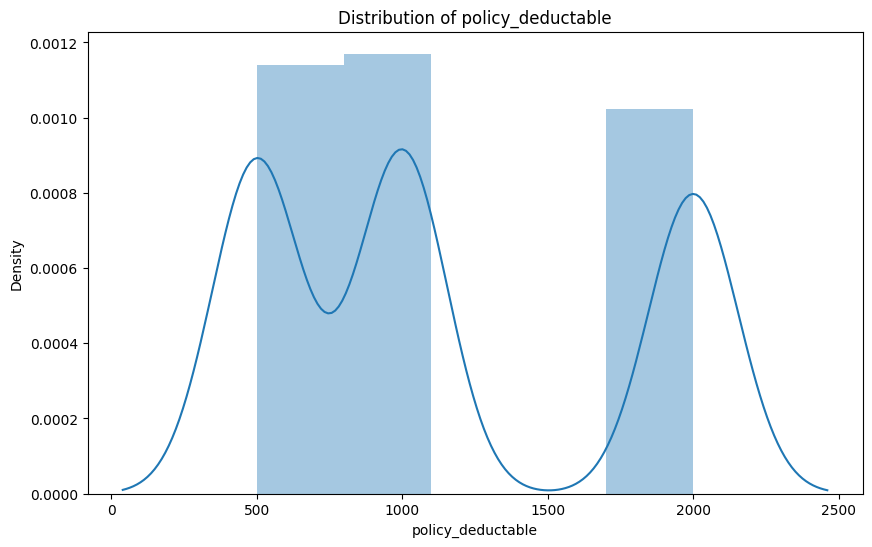

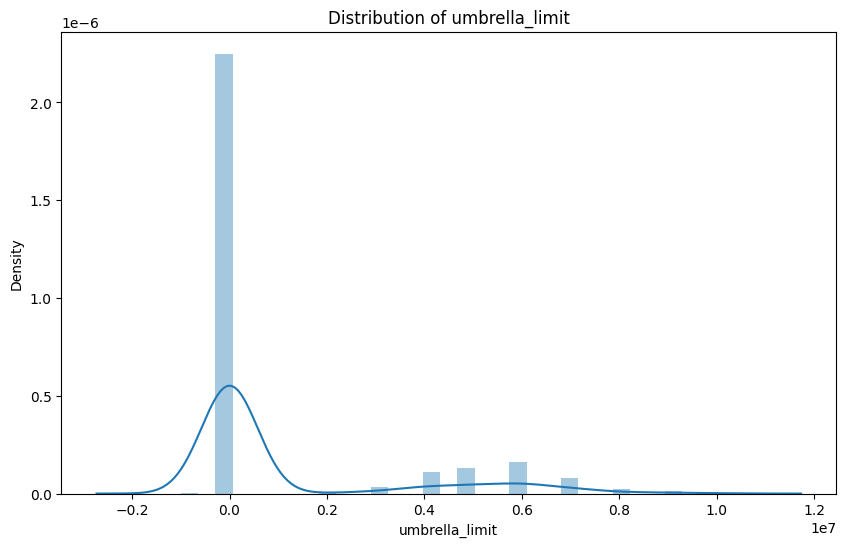

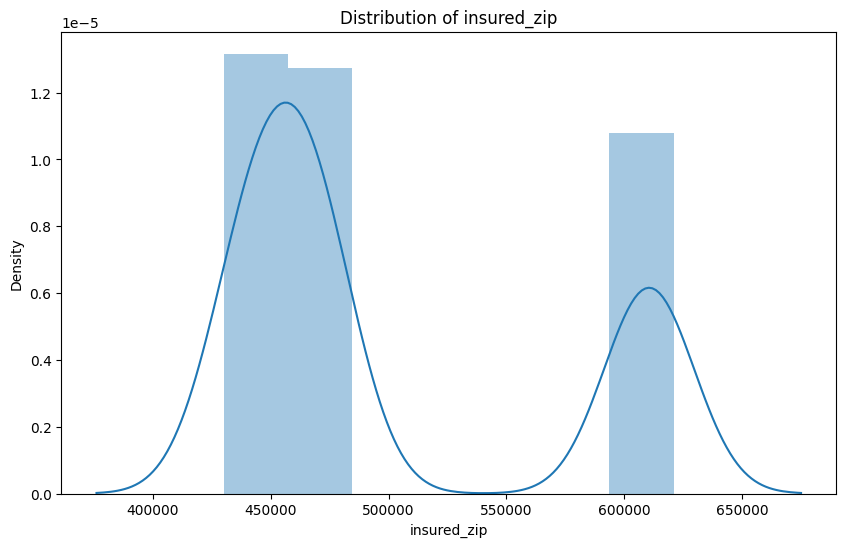

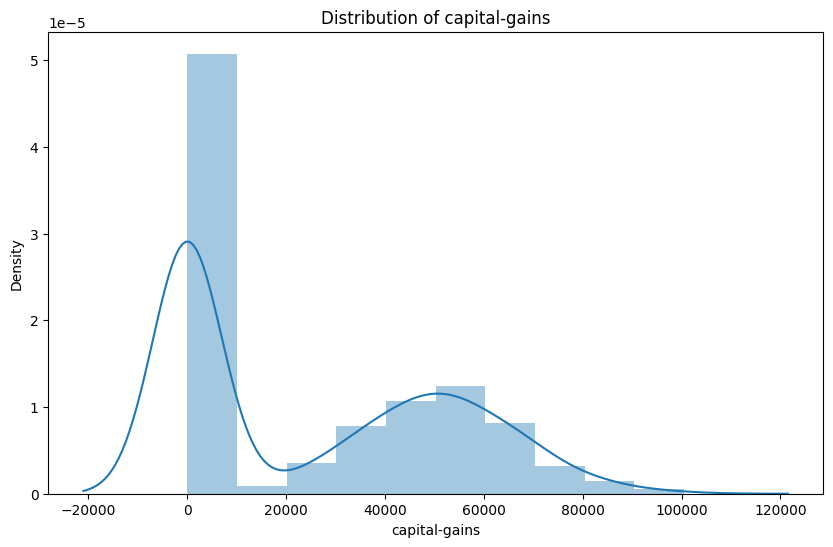

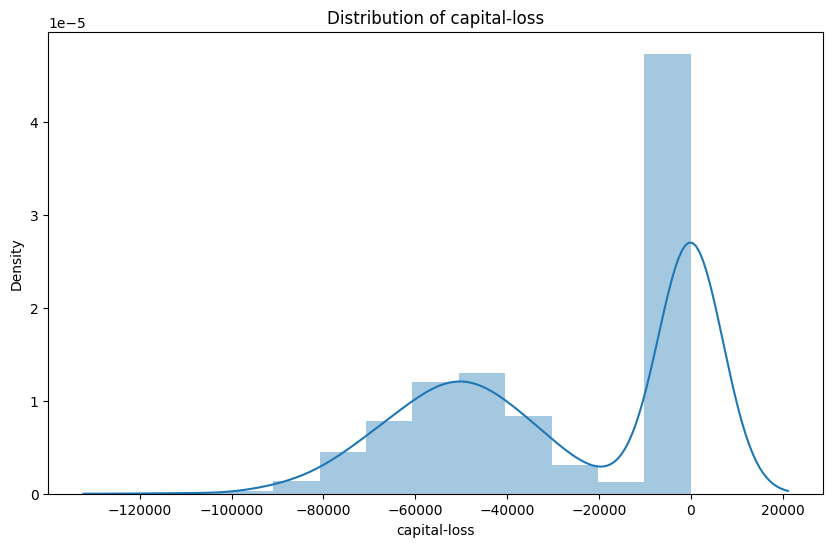

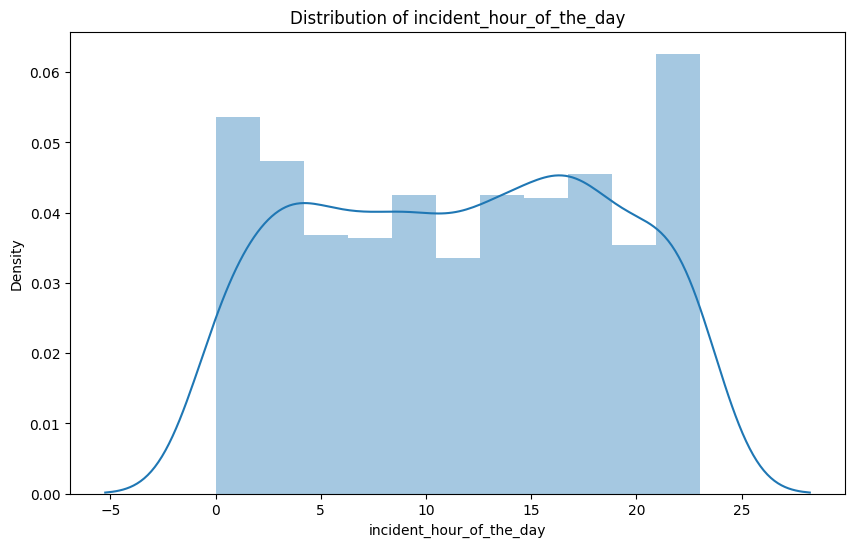

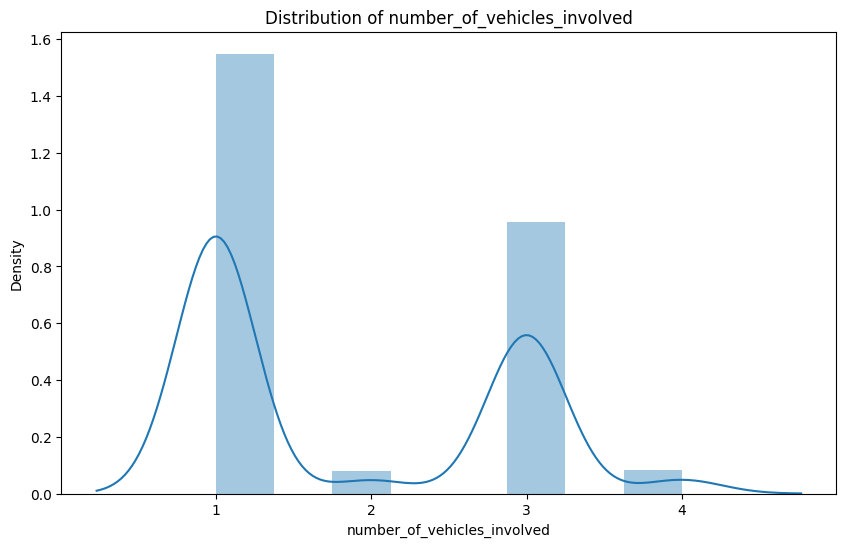

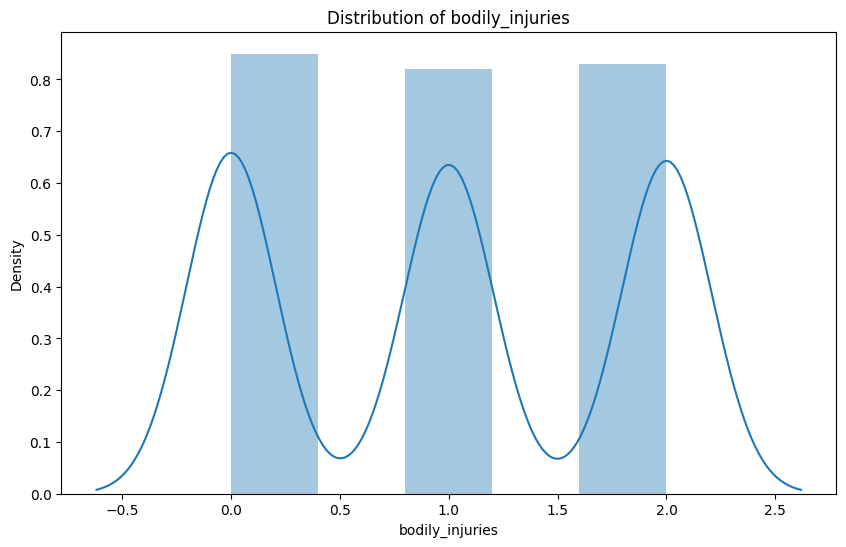

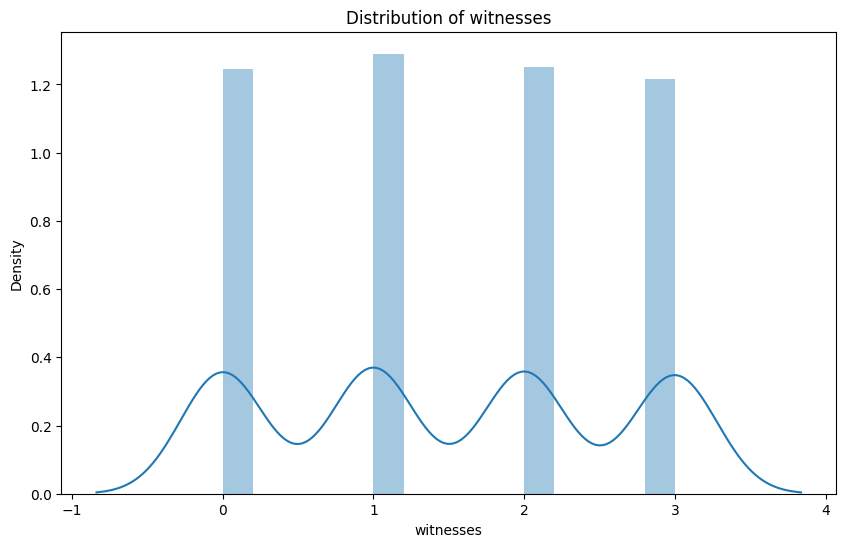

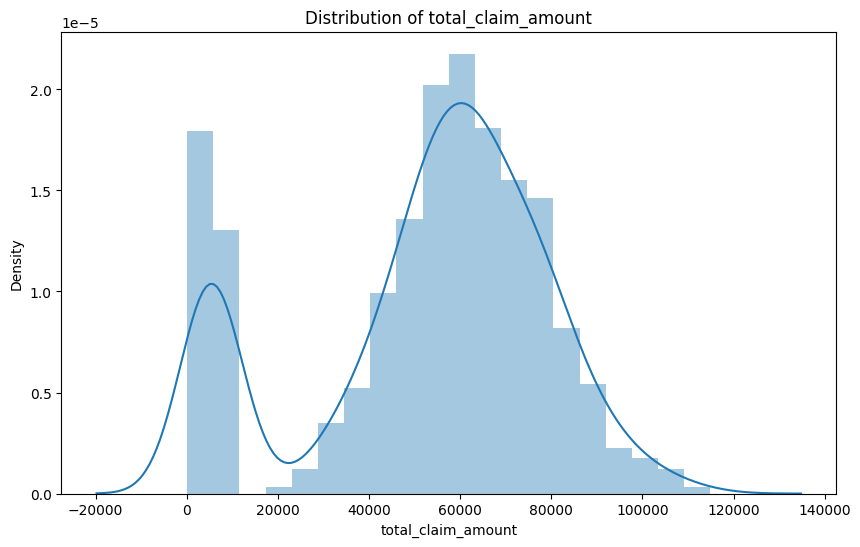

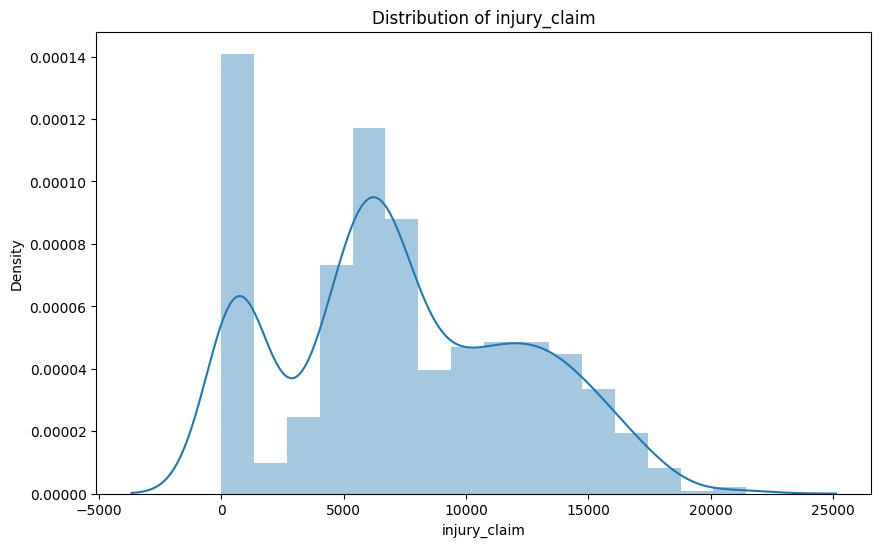

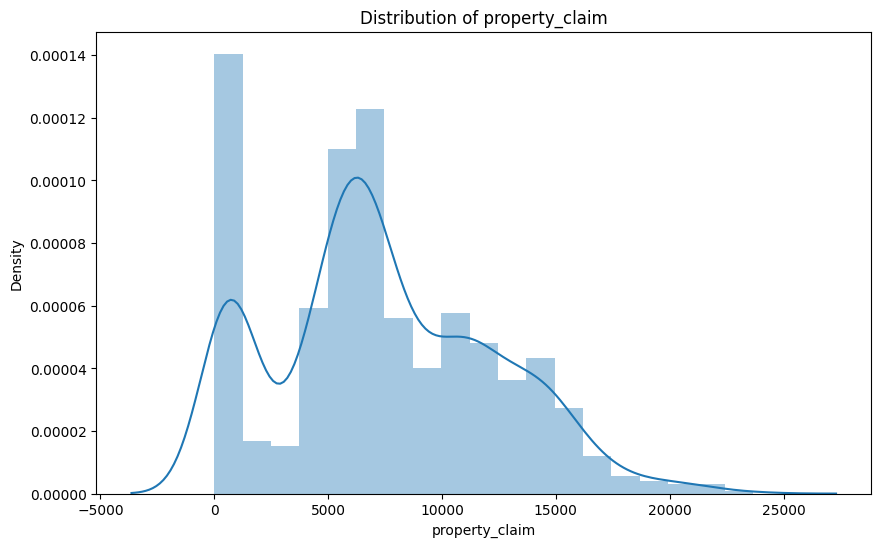

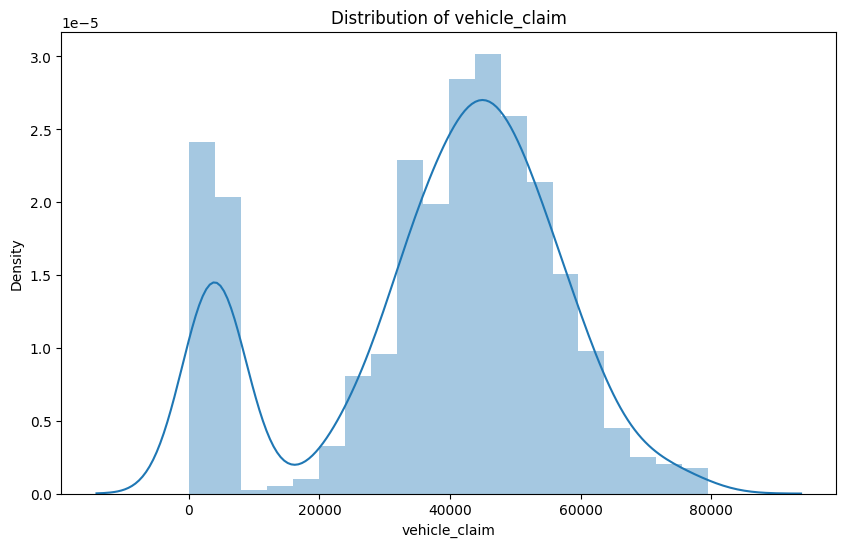

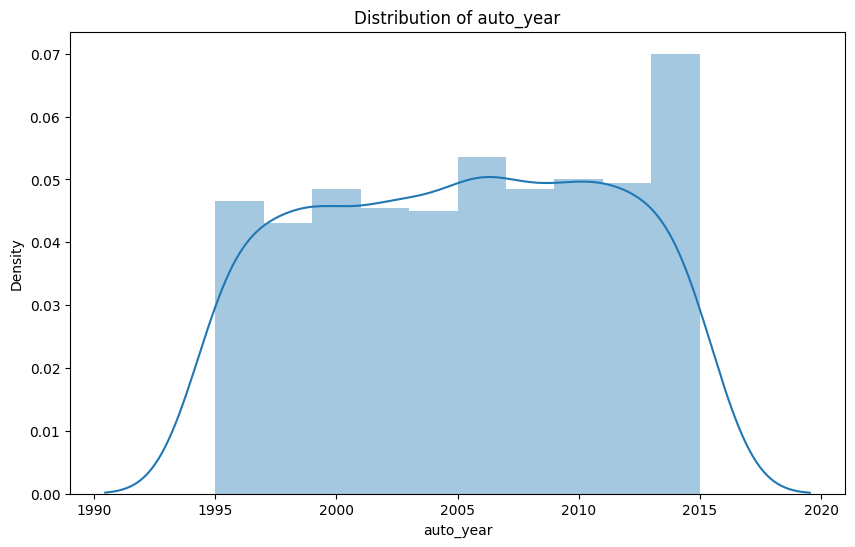

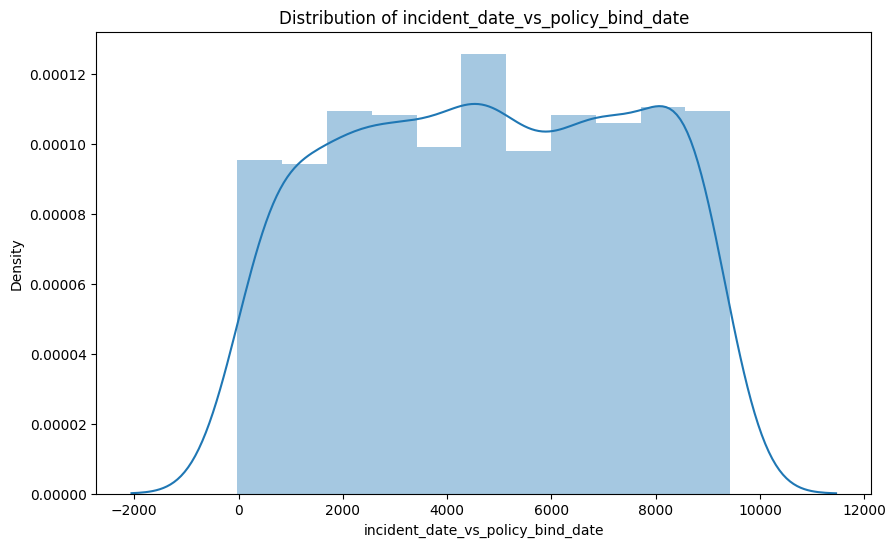

In [169]:
for col in df.select_dtypes(include='int64'):
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [170]:
df_new.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_date_vs_policy_bind_date
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,2,71610,6510,13020,52080,Saab,92x,2004,Y,100
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N,5371
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,9260
5,256,39,2006-12-10,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-02-01,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,0,2,64100,6410,6410,51280,Saab,95,2003,Y,2975
6,137,34,2000-04-06,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,0,0,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,5395


In [171]:
df_new['lower_limit'] = df_new['policy_csl'].apply(lambda x: x.split('/')[0])
df_new['upper_limit'] = df_new['policy_csl'].apply(lambda x: x.split('/')[1])

In [172]:
df_new.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_date_vs_policy_bind_date,lower_limit,upper_limit
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,1,2,71610,6510,13020,52080,Saab,92x,2004,Y,100,250,500
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,2,3,34650,7700,3850,23100,Dodge,RAM,2007,N,5371,100,300
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-10-01,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,1,2,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,9260,250,500
5,256,39,2006-12-10,OH,250/500,1000,1351.10,0,478456,FEMALE,PhD,tech-support,bungie-jumping,unmarried,0,0,2015-02-01,Multi-vehicle Collision,Rear Collision,Major Damage,Fire,SC,Arlington,8973 Washington St,19,3,0,2,64100,6410,6410,51280,Saab,95,2003,Y,2975,250,500
6,137,34,2000-04-06,IN,250/500,1000,1333.35,0,441716,MALE,PhD,prof-specialty,board-games,husband,0,-77000,2015-01-13,Multi-vehicle Collision,Front Collision,Minor Damage,Police,NY,Springfield,5846 Weaver Drive,0,3,0,0,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,5395,250,500


In [173]:
#droping column
df_new=df_new.drop(columns=['policy_bind_date','insured_zip','incident_date','incident_location',])

In [174]:
df_new['fraud_reported'].value_counts()

N    591
Y    231
Name: fraud_reported, dtype: int64

In [175]:
#Removing Outliers Using IQR
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
IQR = q3 - q1
df1 = df_new[~((df_new < (q1 - 1.5 * IQR)) | (df_new > (q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

(638, 35)

In [176]:
df1['fraud_reported'].value_counts()

N    468
Y    170
Name: fraud_reported, dtype: int64

In [177]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df1.columns:
    if df1[col].dtype == 'O':
        df1[col] = le.fit_transform(df1[col])

In [178]:
#Selecting feature and target variable
x=df1.drop(['fraud_reported'],axis=1)
y=df1['fraud_reported']

In [179]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [180]:
y1.value_counts()

1    468
0    468
Name: fraud_reported, dtype: int64

In [181]:
#Standadizing datavalues
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=pd.DataFrame(scaler.fit_transform(x1),columns=x1.columns)

In [182]:
x1.skew()

months_as_customer                   0.337683
age                                  0.410029
policy_state                         0.055658
policy_csl                           0.321195
policy_deductable                    0.416196
policy_annual_premium                0.069025
umbrella_limit                       0.000000
insured_sex                          0.484411
insured_education_level              0.062891
insured_occupation                  -0.018194
insured_hobbies                      0.071364
insured_relationship                 0.214372
capital-gains                        0.396726
capital-loss                        -0.334502
incident_type                        0.424412
collision_type                       0.159396
incident_severity                    0.466840
authorities_contacted                0.104022
incident_state                      -0.004390
incident_city                        0.204573
incident_hour_of_the_day            -0.251138
number_of_vehicles_involved       

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(data_frame.values, i) for i in range(data_frame.shape[1])]
    return vif_data

def drop_highest_vif(data_frame):
    while True:
        vif_data = calculate_vif(data_frame)
        max_vif_index = vif_data['VIF'].idxmax()
        max_vif = vif_data.loc[max_vif_index, 'VIF']

        if max_vif > 5:
            print(f"Dropping variable '{vif_data.loc[max_vif_index, 'Variable']}' with VIF {max_vif}")
            data_frame = data_frame.drop(columns=[vif_data.loc[max_vif_index, 'Variable']])
        else:
            break

    return data_frame

# Initial VIF calculation
initial_vif_data = calculate_vif(x1)
print("Initial VIF:")
print(initial_vif_data)

# Drop variables iteratively until all VIF values are less than 5
x_after_vif = drop_highest_vif(x1)

# Final VIF calculation
final_vif_data = calculate_vif(x_after_vif)
print("\nFinal VIF:")
print(final_vif_data)

Initial VIF:
                             Variable           VIF
0                  months_as_customer  7.008622e+00
1                                 age  7.010400e+00
2                        policy_state  1.066804e+00
3                          policy_csl           inf
4                   policy_deductable  1.074265e+00
5               policy_annual_premium  1.061206e+00
6                      umbrella_limit           NaN
7                         insured_sex  1.085049e+00
8             insured_education_level  1.074196e+00
9                  insured_occupation  1.044751e+00
10                    insured_hobbies  1.082690e+00
11               insured_relationship  1.064044e+00
12                      capital-gains  1.062253e+00
13                       capital-loss  1.073780e+00
14                      incident_type  3.654573e+00
15                     collision_type  1.122105e+00
16                  incident_severity  1.209860e+00
17              authorities_contacted  1.048130e+00

In [184]:
final_vif_data['Variable'].unique()

array(['age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'incident_date_vs_policy_bind_date', 'lower_limit', 'upper_limit'],
      dtype=object)

In [185]:
x1=x1[['months_as_customer', 'policy_state', 'policy_deductable',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day', 'bodily_injuries',
       'witnesses', 'auto_make', 'auto_model',
       'incident_date_vs_policy_bind_date', 'lower_limit', 'upper_limit']]

In [186]:
x1.head()

,months_as_customer,policy_state,policy_deductable,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,bodily_injuries,witnesses,auto_make,auto_model,incident_date_vs_policy_bind_date,lower_limit,upper_limit
0,1.102319,1.291901,-0.266556,0.0,1.270640,0.615199,-1.249890,1.426516,-1.371018,0.973451,0.964478,1.234063,1.449095,-0.928381,1.489317,0.489009,-0.925260,-1.148842,0.21115,0.529796,0.967203,-1.704390,-1.816266,0.229602,1.416069
1,0.453134,1.291901,-0.266556,0.0,-0.787005,1.698598,1.465118,-1.153973,1.088537,-0.947710,0.964478,-0.810332,0.125824,-0.928381,-0.390657,0.489009,-1.443848,1.004867,-1.04768,0.529796,0.967203,-1.516518,-0.702370,0.229602,1.416069
2,-0.619823,0.038824,-0.266556,0.0,1.270640,1.698598,0.650616,-1.338294,-1.371018,-0.947710,-1.795069,-0.810332,-1.197447,0.292075,1.489317,-1.011687,1.667683,-1.918024,-1.04768,-1.384835,0.705932,0.925808,0.235240,0.229602,1.416069
3,-0.367363,-1.214253,-0.266556,0.0,1.270640,-1.551598,1.465118,-1.706935,1.088537,-0.947710,0.964478,-0.810332,-1.197447,1.512531,1.489317,0.989241,-0.925260,1.620212,1.46998,0.529796,-1.384230,-1.328647,1.681562,-1.057270,0.095909
4,-1.611633,-1.214253,-1.121231,0.0,-0.787005,1.698598,0.107614,-0.048049,0.473648,-0.947710,0.964478,1.234063,-1.197447,1.512531,1.489317,1.489473,-1.443848,1.312540,0.21115,-0.427519,1.489743,-0.952905,0.656390,-1.057270,0.095909


#Model Selection

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAcc=0
maxRs=0

for i in range(1,200):
  x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=i)
  RFC=RandomForestClassifier()
  RFC.fit(x_train,y_train)
  pred=RFC.predict(x_test)
  acc=accuracy_score(y_test,pred)
  if acc>maxAcc:
    maxAcc=acc
    maxRs=i
print('Best Accuracy', maxAcc, 'random_state is', maxRs)

Best Accuracy 0.9074733096085409 random_state is 123


In [188]:
#train-test split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.3,random_state=maxRs)

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [190]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred_lg=lg.predict(x_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.8612099644128114
[[115  23]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       138
           1       0.85      0.89      0.87       143

    accuracy                           0.86       281
   macro avg       0.86      0.86      0.86       281
weighted avg       0.86      0.86      0.86       281



In [191]:
#RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC=RFC.predict(x_test)
print(accuracy_score(y_test,pred_RFC))
print(confusion_matrix(y_test,pred_RFC))
print(classification_report(y_test,pred_RFC))

0.896797153024911
[[123  15]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       138
           1       0.90      0.90      0.90       143

    accuracy                           0.90       281
   macro avg       0.90      0.90      0.90       281
weighted avg       0.90      0.90      0.90       281



In [192]:
#SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8825622775800712
[[121  17]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.88      0.89      0.89       143

    accuracy                           0.88       281
   macro avg       0.88      0.88      0.88       281
weighted avg       0.88      0.88      0.88       281



In [193]:
#GradientBoostingClassifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
pred_GB=GB.predict(x_test)
print(accuracy_score(y_test,pred_GB))
print(confusion_matrix(y_test,pred_GB))
print(classification_report(y_test,pred_GB))

0.8932384341637011
[[122  16]
 [ 14 129]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       138
           1       0.89      0.90      0.90       143

    accuracy                           0.89       281
   macro avg       0.89      0.89      0.89       281
weighted avg       0.89      0.89      0.89       281



In [194]:
#AdaBoostClassifier
Ada=AdaBoostClassifier()
Ada.fit(x_train,y_train)
pred_Ada=Ada.predict(x_test)
print(accuracy_score(y_test,pred_Ada))
print(confusion_matrix(y_test,pred_Ada))
print(classification_report(y_test,pred_Ada))

0.8505338078291815
[[122  16]
 [ 26 117]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       138
           1       0.88      0.82      0.85       143

    accuracy                           0.85       281
   macro avg       0.85      0.85      0.85       281
weighted avg       0.85      0.85      0.85       281



In [195]:
#BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
pred_bc=bc.predict(x_test)
print(accuracy_score(y_test,pred_bc))
print(confusion_matrix(y_test,pred_bc))
print(classification_report(y_test,pred_bc))

0.8718861209964412
[[117  21]
 [ 15 128]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       138
           1       0.86      0.90      0.88       143

    accuracy                           0.87       281
   macro avg       0.87      0.87      0.87       281
weighted avg       0.87      0.87      0.87       281



In [196]:
#ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)
pred_et=et.predict(x_test)
print(accuracy_score(y_test,pred_et))
print(confusion_matrix(y_test,pred_et))
print(classification_report(y_test,pred_et))

0.693950177935943
[[ 93  45]
 [ 41 102]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68       138
           1       0.69      0.71      0.70       143

    accuracy                           0.69       281
   macro avg       0.69      0.69      0.69       281
weighted avg       0.69      0.69      0.69       281



#Cross Validation

In [198]:
#check cv score for logistic regression

score=cross_val_score(lg,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_lg) - score.mean())

[0.67021277 0.72192513 0.87700535 0.8342246  0.85026738]
0.790727045170099
Difference between accuracy score and cross valication score is 0.07048291924271244


In [199]:
#check cv score for randomforest

score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_RFC) - score.mean())

[0.67553191 0.76470588 0.92513369 0.89839572 0.9197861 ]
0.8367106610535897
Difference between accuracy score and cross valication score is 0.06008649197132132


In [200]:
#check cv score for svc

score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_svc) - score.mean())

[0.65957447 0.73262032 0.90374332 0.88235294 0.90374332]
0.8164068722266469
Difference between accuracy score and cross valication score is 0.06615540535342435


In [201]:
#check cv score for Gradient Boosting

score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_GB) - score.mean())

[0.73404255 0.80213904 0.92513369 0.88770053 0.88770053]
0.8473432699965866
Difference between accuracy score and cross valication score is 0.04589516416711448


In [203]:
#check cv score for Adaboost

score=cross_val_score(Ada,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_Ada) - score.mean())

[0.69680851 0.73796791 0.90374332 0.85561497 0.9144385 ]
0.82171464330413
Difference between accuracy score and cross valication score is 0.02881916452505151


In [204]:
#check cv score for Bagging Classifier

score=cross_val_score(bc,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_bc) - score.mean())

[0.76595745 0.79144385 0.87165775 0.88235294 0.87700535]
0.8376834679713279
Difference between accuracy score and cross valication score is 0.03420265302511338


In [205]:
#check cv score for Extra Tree Classifier

score=cross_val_score(et,x1,y1)
print(score)
print(score.mean())
print('Difference between accuracy score and cross valication score is', accuracy_score(y_test,pred_et) - score.mean())

[0.58510638 0.61497326 0.77005348 0.79144385 0.79679144]
0.7116736830128569
Difference between accuracy score and cross valication score is -0.017723505076913892


Gradient Boosting performs better

AUC: 0.95


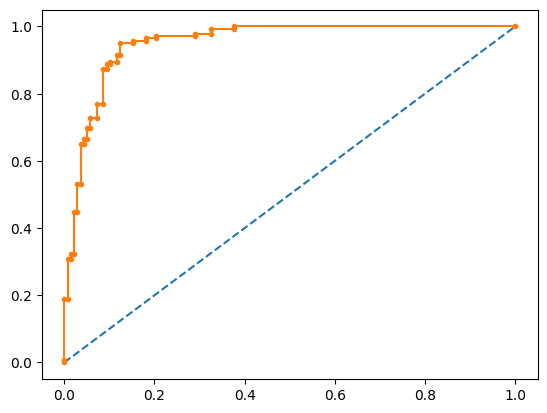

In [206]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

probs = GB.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

#Hyper Parameter Tuning

In [207]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.1,.5, 1],
    'n_estimators': [50,100, 200, 300],
    'max_depth': [None, 5, 10],
}

grid_search = GridSearchCV(GB, param_grid, cv=5, scoring='accuracy',verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END learning_rate=0.01, max_depth=None, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=100; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=None, n_estimators=200; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=No

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [None, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='accuracy', verbose=2)

In [208]:
print('Best parameters:', grid_search.best_params_)
print('Best estimator:', grid_search.best_estimator_)
print('Best score:', grid_search.best_score_)

Best parameters: {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 200}
Best estimator: GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=200)
Best score: 0.8458015267175572


AUC: 0.95


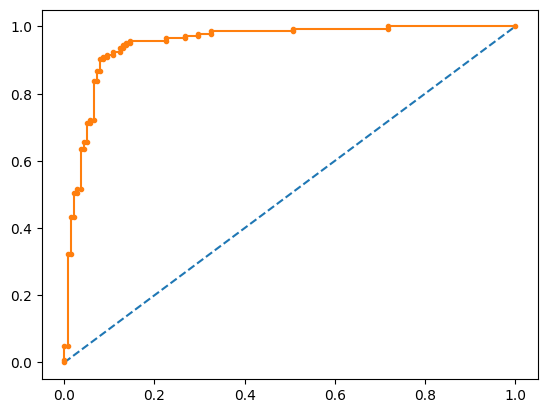

In [209]:
GB_tuned = grid_search.best_estimator_

probs = GB_tuned.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [210]:
final_model=GradientBoostingClassifier(learning_rate=1, max_depth=5, n_estimators=200)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

91.45907473309609


In [211]:
predictions = final_model.predict(x_test)

In [212]:
conclusion={"Predictions:": predictions, 'Actual': y_test}

In [213]:
conclusion=pd.DataFrame(conclusion)
conclusion

,Predictions:,Actual
791,1,1
346,1,1
558,1,1
587,0,0
274,0,0
538,0,0
161,0,0
138,1,1
338,0,0
317,0,0
